# Support Vector Regression (SVR)

## 1. Introduction to Support Vector Regression (SVR)

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.

![title](img/SVR_1.png)

![title](img/SVR_2.png)

We now have an additional hyperparameter, `C`, that we can tune. As `C` increases, our tolerance for points outside of `ϵ` also increases. As `C` approaches 0, the tolerance approaches 0 and the equation collapses into the simplified (although sometimes infeasible) one.

### Finding the Best Value of C

The above model seems to fit the data much better. We can go one step further and grid search over `C` to obtain an even better solution. Let’s define a scoring metric, % within Epsilon. This metric measures how many of the total points within our test set fall within our margin of error. We can also monitor how the `Mean Absolute Error (MAE)` varies with `C` as well.

### Example or SVR with different Kernal 

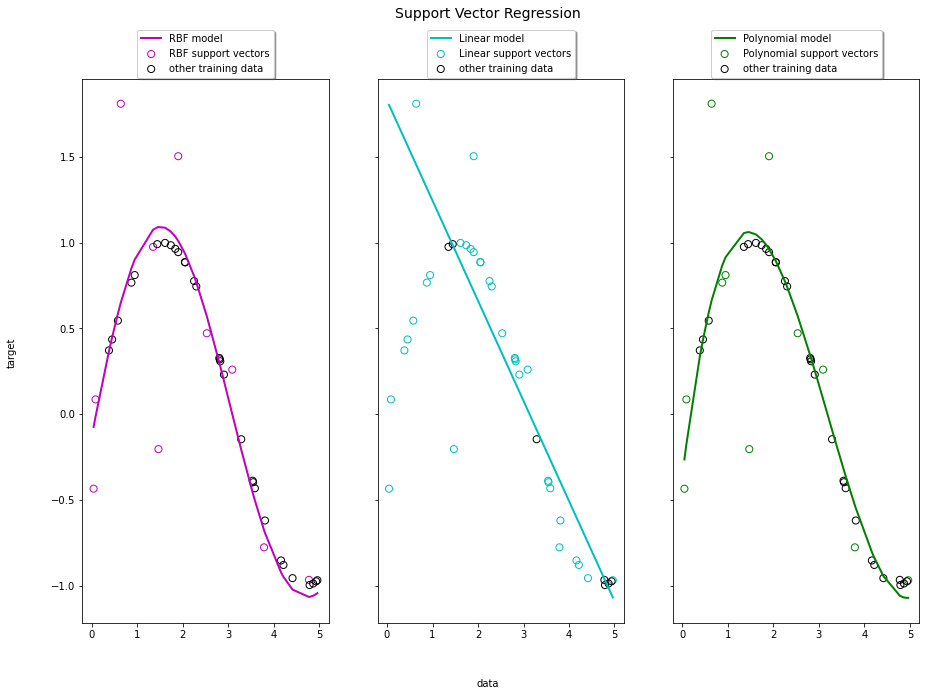

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()  # sin(x)

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2  # line width

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

### Implementing Support Vector Regression (SVR) in Python

Time to put on our coding hats! In this section, we’ll understand the use of Support Vector Regression with the help of a dataset. Here, we have to predict the salary of an employee given a few independent variables.

In [3]:
# Import Labaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Reading the DataSet

In [30]:
# Reading the DataSet 
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [31]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [32]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

#### Feature Scaling

A real-world dataset contains features that vary in magnitudes, units, and range. I would suggest performing normalization when the scale of a feature is irrelevant or misleading.

Feature Scaling basically helps to normalize the data within a particular range. Normally several common class types contain the feature scaling function so that they make feature scaling automatically. However, the SVR class is not a commonly used class type so we should perform feature scaling using Python.

In [33]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [21]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [22]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### Fitting SVR to the dataset

In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y.ravel())

# .values will give the values in an array. (shape: (n,1)
# .ravel will convert that array shape to (n, )

SVR()

#### Predicting a new result

In [56]:
y_pred = regressor.predict([[7.5]])
y_pred = sc_y.inverse_transform(y_pred) 
y_pred

array([252789.13920842])

#### Visualizing the SVR results (for higher resolution and smoother curve)

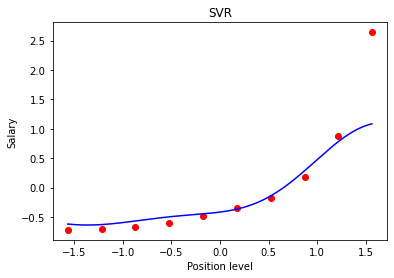

In [52]:
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Disadvantages of Support Vector Regression

Some of the drawbacks faced by Support Vector Machines while handling regression problems are as mentioned below:
1. They are not suitable for large datasets.
2. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
3. The Decision model does not perform very well when the data set has more noise i.e. target classes are overlapping.